In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
%matplotlib inline
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


od.download("https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda")

In [7]:
file = "black_friday.csv"
data = pd.read_csv(file)

# 1. Общие сведения:


In [8]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
data.shape

(550068, 12)

In [11]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# 2. Пустые значения


In [12]:
data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [13]:
data.isnull().sum().sum()

556885

<Axes: >

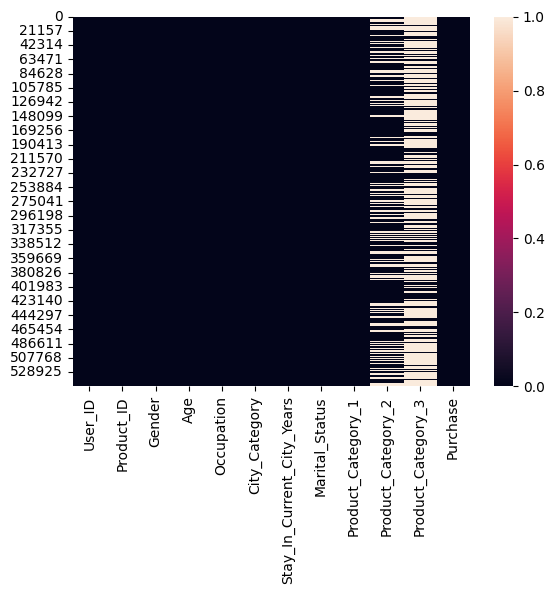

In [14]:
sns.heatmap(data.isnull())

# 3. Дубликаты

In [15]:
data.duplicated().sum()

0

# 4. Переименуем некоторые столбцы

In [16]:
data.rename(columns={'User_ID':'UserID','Product_ID':'ProductID','Product_Category_1':'product1','Product_Category_2':'product2','Product_Category_3':'product3','Marital_Status':'maritial','Stay_In_Current_City_Years':'city'},inplace=True)
data.head(3)

,UserID,ProductID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


# 5. Уберем лишние стобцы

In [17]:
data.drop(['ProductID'], inplace=True, axis='columns')

In [18]:
data.head(3)

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422


# 6. Пройдемся по каждой из колонок

In [19]:
data['city'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
def cities(value):
  if "+" in value:
    value = value.replace("+", "")
  return int(value)

data['city']=data['city'].apply(cities)

In [21]:
data['city'].unique()

array([2, 4, 3, 1, 0])

In [22]:
data['UserID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [23]:
data['UserID'].dtype

dtype('int64')

In [24]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [25]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [26]:
def ages(value):
    if '0-17' in value:
        value=value.replace('0-17','child')
        return str(value)
    elif '26-35'in value:
        value=value.replace('26-35','adult')
        return str(value)
    elif '18-25'in value:
        value=value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value=value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value=value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value=value.replace('51-55','old')
        return str(value)
    else:
        value=value.replace('55+','old')
        return str(value)

data['Age']=data['Age'].apply(ages)

In [27]:
data['Age'].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

In [28]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [29]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [30]:
data['maritial'].unique()

array([0, 1])

In [31]:
data[['UserID','maritial']].tail()

,UserID,maritial
550063,1006033,1
550064,1006035,0
550065,1006036,1
550066,1006038,0
550067,1006039,1


In [32]:
(data['product2'].isnull().sum() / len(data)) * 100

31.56664266963357

In [33]:
# сгруппируем значения по столбцу Age и найдем моду для каждого Age по столбцу product2
s=data.groupby('Age')['product2'].agg(pd.Series.mode)
s

,product2
Age,
adult,8.0
child,4.0
old,8.0
teenage,8.0


In [34]:
# Заполним все null в product2 значениями мод по возрасту
for key in s.index:
  data.loc[(data['Age'] == key) & (data['product2'].isnull()), 'product2'] = s[key]

In [35]:
data['product2'].isnull().sum()

0

In [36]:
data['product3'].value_counts()

,count
product3,
16.0,32636
15.0,28013
14.0,18428
17.0,16702
5.0,16658
8.0,12562
9.0,11579
12.0,9246
13.0,5459


In [37]:
(data['product3'].isnull().sum() / len(data)) * 100

69.67265865311198

In [38]:
# сначала группируем, потом агрегируем по столбцу product3 по моде
data.groupby('Age')['product3'].agg(pd.Series.mode)

,product3
Age,
adult,16.0
child,16.0
old,16.0
teenage,16.0


In [39]:
p=data.groupby('Age')['product3'].agg(pd.Series.mode)
p

,product3
Age,
adult,16.0
child,16.0
old,16.0
teenage,16.0


In [40]:
for key in p.index:
    data.loc[(data['Age']==key) & (data['product3'].isnull()), 'product3']=p[key]

In [41]:
data['product3'].isnull().sum()

0

# 7. Посмотрим на данные после обработки

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       550068 non-null  float64
 9   product3       550068 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [43]:
data.isnull().sum()

,0
UserID,0
Gender,0
Age,0
Occupation,0
City_Category,0
city,0
maritial,0
product1,0
product2,0
product3,0


<Axes: >

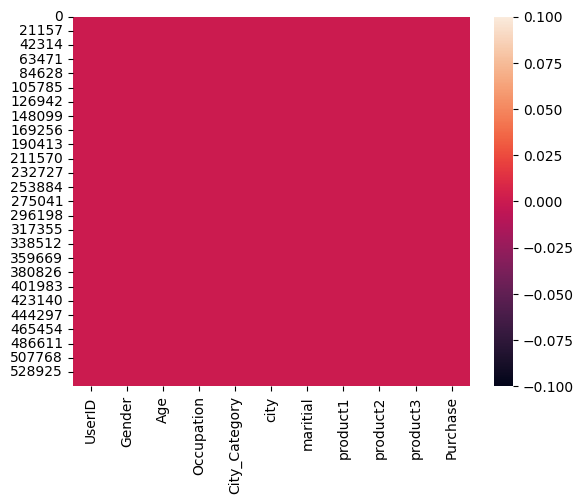

In [44]:
sns.heatmap(data.isnull())

# 8. Визуализируем данные

<ipython-input-45-a746e28fde3f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age',y='Purchase',data=data,palette='Set1')


<Axes: title={'center': 'Age and Purchase'}, xlabel='Age', ylabel='Purchase'>

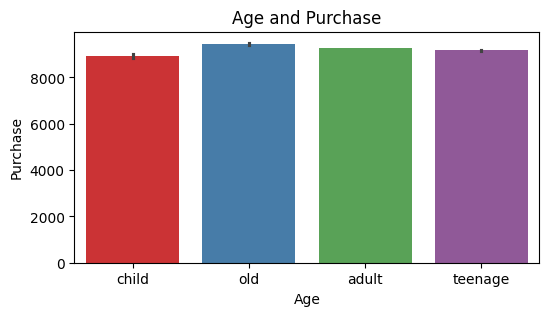

In [45]:
plt.figure(figsize=(6,3))
plt.title('Age and Purchase')
sns.barplot(x='Age',y='Purchase',data=data,palette='Set1')

<ipython-input-46-ddb2708d6058>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=data,palette='muted')
<ipython-input-46-ddb2708d6058>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age',data=data,palette='rocket')
<ipython-input-46-ddb2708d6058>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupation', data=data, palette='muted')
<ipython-input-46-ddb2708d6058>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

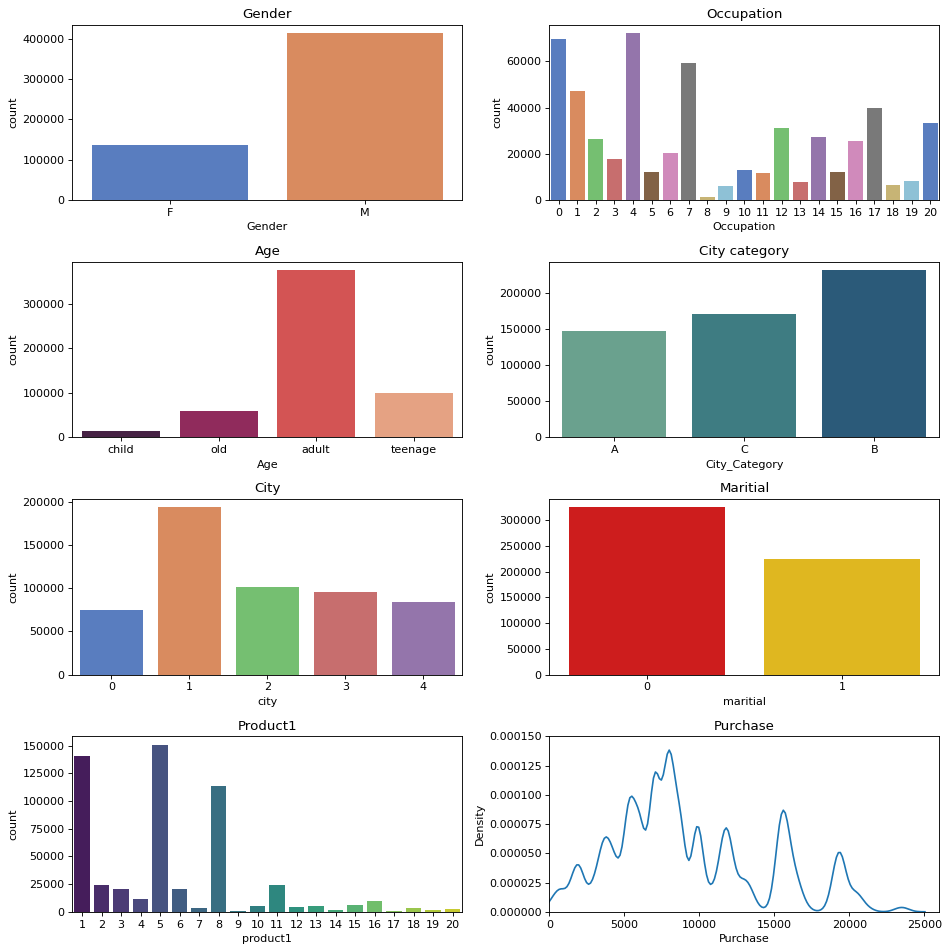

In [46]:
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(x='Gender',data=data,palette='muted')

plt.subplot(4,2,3)
plt.title('Age')
sns.countplot(x='Age',data=data,palette='rocket')

plt.subplot(4,2,2)
plt.title('Occupation')
sns.countplot(x='Occupation', data=data, palette='muted')

plt.subplot(4,2,4)
plt.title('City category')
sns.countplot(x='City_Category', data=data, palette='crest')

plt.subplot(4,2,5)
plt.title('City')
sns.countplot(x='city',data=data,palette='muted')

plt.subplot(4,2,6)
plt.title('Maritial')
sns.countplot(x='maritial',data=data, palette='hot')

ax=plt.subplot(4,2,8)
plt.title('Purchase')
ax.set_ylim(0,0.00015)
ax.set_xlim(0,26000)
sns.kdeplot(x='Purchase', data=data)

plt.subplot(4,2,7)
plt.title('Product1')
sns.countplot(x='product1',data=data,palette='viridis')

plt.tight_layout()
plt.show()

Из графиков видим:

**Пол:**

График показывает, что количество мужчин больше, чем женщин.
Количество мужчин = 4000
Количество женщин = 1500

**Возраст:**

График показывает, что большинство посетителей магазина — взрослые. Взрослыми считаются люди в возрасте от 26 до 50 лет. Меньше всего посещают магазин дети.

**Семейное положение:**

Большинство людей, посещающих магазин, находятся в браке, и их количество больше по сравнению с одинокими.
Количество женатых = 300 000
Количество одиноких = 200 000

**Покупки:**

Частота покупок выше всего в диапазоне от 5000 до 10 000.
Максимальная стоимость покупок доходит до 250 000.

**Категория города:**

Большинство людей, посещающих магазин, относятся к категории города B. Меньше всего посещают магазин люди из категории города A.

**Город:**

Максимальное количество посетителей магазина проживает в городе 1. Меньше всего посетителей из города 0.
Из этого можно заключить, что магазин расположен в городе 1.

<ipython-input-51-2c0db990bd98>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender',y='Purchase',data=data,palette='autumn')


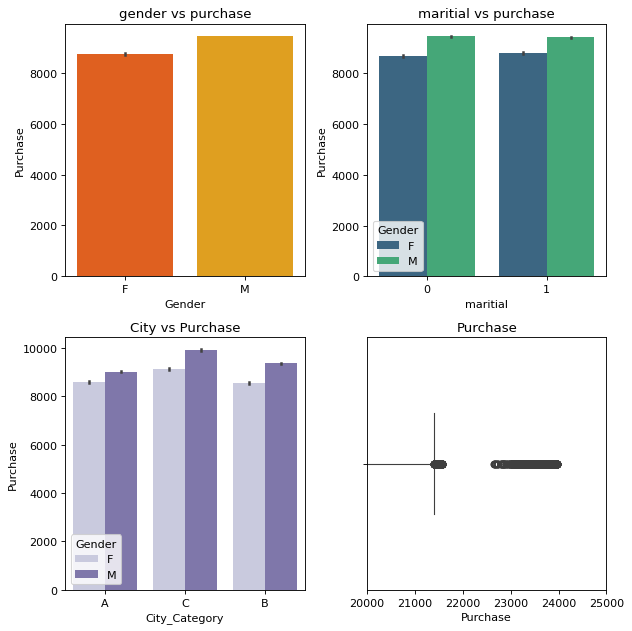

In [51]:
plt.figure(figsize=(8,8),dpi=80)
plt.subplot(2,2,1)
plt.title('gender vs purchase')
sns.barplot(x='Gender',y='Purchase',data=data,palette='autumn')

plt.subplot(2,2,2)
plt.title('maritial vs purchase')
sns.barplot(x='maritial',y='Purchase',hue='Gender',data=data,palette='viridis')

plt.subplot(2,2,3)
plt.title('City vs Purchase')
sns.barplot(data=data,x='City_Category',y='Purchase',hue='Gender',palette='Purples')

ax=plt.subplot(2,2,4)
ax.set_xlim(20000, 25000)
plt.title('Purchase')
sns.boxplot(x='Purchase', data=data)


plt.tight_layout()
plt.show()

С помощью boxplot обнаружил значения которые выбиваются из выборки, их можно удалить или заменить на средние